**Gotta figure out how to amke this nice**

Table of Contents:

1. Introduction

    1.1 Background Information
    
    1.2 Project Direction and Scope
    
    1.3 Project Significance
    
    1.4 Project Model Rundown
    
    1.5 Importing relevant modules
  
  
2. Implementing the Model in Python

    2.1 Model Implementation

    2.2 Model Output Verification
    
    2.3 Model Extension (Optional Arguments)


3. Improvements to Model

    3.1 Increasing Model Customizability

    3.2 Account for Negative Values
    
    3.3 Improvement on default parameters
    
    3.4 Account for overwatering
    
    3.5 Account for maximum plant growth
    

4. Referencing empirical data

# Introduction

## Background Information

**This will explain plants, watering, how water levels (and other factos that are in our scope) affect plant growth. Explain dry mass accumulation and why dry mass, etc etc whatever, provide audience with necessary information to digest the rest of the paper more easily**

## Project Direction and Scope

**In this project, we intend to do xxx. These xxx things are within our scope, and yyy is outside of our scope. Brief introduction to significance or why this can benefit the world**

## Project Significance

**The benefit of doing this is that...... There is significant possibility for scientific advancement and research leading to improvement in agriculture and food production. Loook at these examples of significance of agriculture-heavy countries, and the ability for greater intensiveness in farming. Significant in traditional farming in fields, and even more so in hydroponics (link to singapore context where a large proportion of farming is hydroponics and our model works even better for intensive farming since quantities can be more precisely determined)**

[Water is the most limiting abiotic factor in determining plant growth](https://www.nature.com/scitable/knowledge/library/water-uptake-and-transport-in-vascular-plants-103016037/)

According to Yuan Zhe:"**DO YOU EAT VEGETABLES?** If you say yes, this topic is **important**."

The amount of water a plant uptakes has a significant impact on its rate of growth [(Kabir et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0304423821000091). 

Being able to predict plant growth rates under different levels of irrigation leads to greater efficiency in biomass production, allowing more food to be produced more efficiently [(Wang et al., 2022)](https://www.frontiersin.org/articles/10.3389/fpls.2022.1069190).

The optimal growth environments for plants that are being conserved can also be predicted with this model, allowing more effective conservation efforts for endangered species of plants [(Meier et al., 2017)](http://www.jstor.org/stable/45220869).
As the water availability changes globally as a result of global warming, understanding how plants respond to variation in irrigation level may help in predicting how plant life is likely to be affected [(Kaini et al., 2022)](https://www.mdpi.com/2073-4441/14/17/2728).
Different plants have different growth characteristics and optimal water conditions to grow at. This model will be useful for farmers to predict the growth of specific plants in specific environment conditions.

By modeling the impact of water availability on plant growth rates using Python, we can predict the optimal water conditions that ensures maxmium plant growth, ultimately contributing to agricultural production, conservation and understanding how plant respond to climate change.

## Model of Interest

**So this is [our paper](https://www.mdpi.com/2227-7390/10/1/151) and we are going to run through the main differential equations used in their model below. We are going to build off of this model. We can explain what the constants here, put a table here for easier reader reference. Also point out which constants are arbitrarily determined. We might want to rename the constants so they're easier to refer to. Eg. kappa and k can just be k_1 and k_2**

I would recommend using `k_1, g, m, d, r, b, k_2, y, p` for our variables.

To model the impact of water availability on plant growth rate, the paper describe 3 mathematical formula representing the relationship between water supplied to the plant and the change of plant drymass/size over time.

\begin{equation}
x'(t) = \dfrac{k_1 x(t)w(t)}{1+gx(t)} - mx(t)
\end{equation}

\begin{equation}
w'(t) = \delta\dfrac{w(t)v(t)}{1+rw(t)} - \beta w(t) - \dfrac {kx(t)w(t)}{1+gx(t)}
\end{equation}

\begin{equation}
v'(t) = -\gamma v(t) - \rho\dfrac{w(t)v(t)}{1+rw(t)}
\end{equation}

where $x(t)$, $w(t)$ and $v(t)$ represents the plant drymass/size, water content in plant available for growth and soil water availability at time $t$ respectively.

**Equation (1)** models the growth rate of plants. The first term of the equation, $\dfrac{\kappa x(t)w(t)}{1+gx(t)}$ , corresponds to the growth rate of the plant that is influenced by water availability while the second term of the equation, $-mx(t)$, represents the degradation rate of plants that is proportional to plant size.


**Equation (2)** models the changes in water content in plant available for growth. The first term of the equation, $\delta\dfrac{w(t)v(t)}{1+rw(t)}$, corresponds to the *water gain* from the soil into the plant. The second term of the equation, $-\beta w(t)$, corresponds to the *water loss* from the plant through transpiration. The last term of the equation, $-\dfrac {kx(t)w(t)}{1+gx(t)}$, corresponds to the *water loss* from the plant through photosynthesis.


**Equation (3)** models the changes in soil water availability. The first term of the equation, $-\gamma v(t)$, corresponds to *water loss* from the soil through evaporation while the second term of the equation, $-\rho\dfrac{w(t)v(t)}{1+rw(t)}$, corresponds to *water loss* from the soil to the plant.

## Importing relevant modules

In [1]:
import numpy as np                                    # I don't believe we need this yet: remove this comment if we use np.
from matplotlib import pyplot as plt                  # Obviously used for plotting

# Implementing the Model in Python

## Model Direct Implementation

We are first generating a few helper functions so that our model implementation will be easier to parse. These helper functions aren't super important and you can skip them for now.

But if you want to know, TLDR of our 3 main helper functions are below.

`generate_hold_lists()` creates 4 lists for storing all values of timepoints, x, w, and v as our model runs.

`update_next_timepoint()` updates our generated lists and is in charge of carrying out the calculations at every timepoint.

`draw_nice_graph()` takes in our final produced lists of values and plots it nicely to our specifications.

In [2]:
def generate_hold_lists(num_ticks, x_0, w_0, v_0):
    '''
    This function takes in 4 integer inputs.
    num_ticks: the number of ticks we want our simulation to run for
    x_0, w_0, v_0: the values of x, w, and v respectively at time 0
    
    The function outputs a tuple containing 4 lists, which hold timepoints, x values, w values, and v values respectively.
    '''
    hold_timepoint = [timepoint for timepoint in range(0, num_ticks+1)]
    hold_x = [x_0]
    hold_w = [w_0]
    hold_v = [v_0]
    
    return (hold_timepoint, hold_x, hold_w, hold_v)

In [3]:
def update_next_timepoint(parameter_values, hold_x, hold_w, hold_v):
    '''
    Takes in 4 iterables, parameter_values, hold_x, hold_w, and hold_v.
    parameter_values has to be in the sequence (k_1, g, m, d, r, b, k_2, y, p).
    These input parameters provide the necessary information for this function to update the lists referenced.
    Since lists are mutable, this function does not return any value but directly manipulates the lists passed.
    '''
    k_1, g, m, d, r, b, k_2, y, p = parameter_values        # unpack the input iterables 
    
    last_x = hold_x[-1]                    # find the x, w, v at the last timepoint
    last_w = hold_w[-1]
    last_v = hold_v[-1]
    
    x_change = (k_1 * last_x * last_w/(1 + g * last_x)) - (m * last_x)         # calculate changes in x, w, and v
    w_change = (d * last_w * last_v / (1 + r * last_w)) - (b * last_w) - (k_2 * last_x * last_w / (1 + g * last_x))
    v_change = (-y * last_v) - (p * last_w * last_v / (1 + r * last_w))
    
    new_x = last_x + x_change
    new_w = last_w + w_change
    new_v = last_v + v_change
    
    hold_x.append(new_x)
    hold_w.append(new_w)
    hold_v.append(new_v)

In [4]:
def create_graph_info(all_timepoints, *plots):
    '''
    change name of function to create_graph_info()
    change so that the function takes in a set 4 parameters, no reason to accept varying number of arguments
    
    previous function:
    
    Takes in 1 necessary argument, and a variable number of optional arguments.
    Necessary argument is all_timepoints, a list of all timepoints to serve as the x-axis.
    Optional arguments are more iterables that will be plotted on the y-axis.
    These optional arguments should consist of 2 elements, the first one a string for the plot label.
    The second element in these arguments should be the raw data itself to be plotted.
    '''
    all_plot_info = (all_timepoints, ) + plots
    return all_plot_info     # returns a tuple first with the list of timepoints followed by the plot info of every plot

# ^ each one of these will be termed as "graphs" or "graph_info"

In [5]:
def draw_nice_graph(*graphs):
    '''
    Takes in a range of graph plot infos anywhere from 1 to 4 plots and creates nicely spaced out graphs.
    '''
    
    holder = []
    
    
    for item in graphs:
        holder.extend([item])
    
    if len(holder) == 1:
        num_cols, num_rows = 1, 1
        fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(5, 5))
        
        for graph_data in holder:
            for y_values in graph_data[1:]:
                ax.plot(graph_data[0], y_values[1], label=y_values[0])
            ax.legend()
            ax.set_xlabel("Time / Arbitrary Units")
            ax.set_ylabel("Value / Arbitrary Units")
    
    elif len(holder) < 4:
        num_cols, num_rows = len(holder), 1
        fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(12, 5))
        
        for i, graph_data in enumerate(holder):
            for y_values in graph_data[1:]:
                ax[i].plot(graph_data[0], y_values[1], label=y_values[0])
            ax[i].legend()
            ax[i].set_xlabel("Time / Arbitrary Units")
            ax[i].set_ylabel("Value / Arbitrary Units")
    
    else:
        num_cols, num_rows = 2, 2
        fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(10, 8))
        
        for j, graph_data in enumerate(holder):
            a = 1 if j > 1 else 0
            b = 1 if j % 2 else 0
            
            for y_values in graph_data[1:]:
                ax[a][b].plot(graph_data[0], y_values[1], label=y_values[0])
            ax[a][b].legend()
            ax[a][b].set_xlabel("Time / Arbitrary Units")
            ax[a][b].set_ylabel("Value / Arbitrary Units")
    
    plt.show()

Now that we have constructed the necessary helper functions, we can move on to our main model and the implementation of it! The model is quite simple in terms of code.

In [6]:
def model_plant_growth(x_0, w_0, v_0, time_ticks = 300):
    '''
    A function that takes in initial values of x(0), w(0), and v(0).
    Also takes in an optional argument time_ticks, an integer representing the number of ticks to run the program for.
    Default parameters for these 2 arguments are 300 and False, respectively.
    Output is a plot of x(t), w(t), and v(t) over time.
    '''
    
    ### Default Variables --- Can be changed! ###
    all_params = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2)
    k_1, g, m, d, r, b, k_2, y, p = all_params                
    
    ### Generating our lists to hold all relevant values ###
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###
    for timepoint in hold_timepoints[1:]:          
        update_next_timepoint(all_params, hold_x, hold_w, hold_v)
    
    ### Creating tuples with labels for each list ###
    x_info = ("Plant Dry Mass", hold_x)
    w_info = ("Mass of water in plant", hold_w)
    v_info = ("Mass of water in soil", hold_v)
    
    return create_graph_info(hold_timepoints, x_info, w_info, v_info)


## Model Output Verification

Now that we have defined our model as a function, and this function generates a plot, we can try running an instance of it to check that it works!

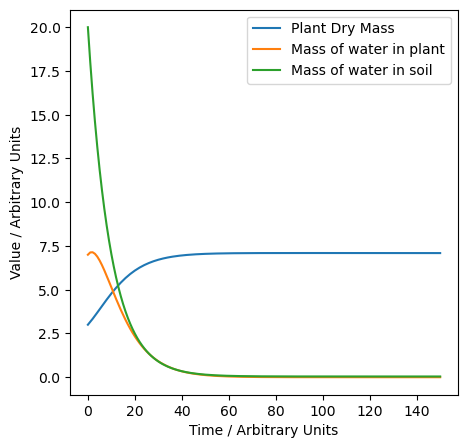

In [7]:
graph = model_plant_growth(3,7,20, time_ticks = 150)
draw_nice_graph(graph)

Looking at this graph, our model seems to generally produce expected results. The mass of water in the soil steadily decreases to 0, as does the mass of water in the plant. Subsequently, plant dry mass can no longer increase once the mass of water in the plant reaches 0.

## Model Extension (Optional Arguments)

The obvious manner in which we could provide irrigation to our plant is by modifying our `update_next_timepoint()` function. If this function were able to take in a boolean about whether or not to irrigate a plant, as well as information on the rules for irrigation (in terms of quantity and when to irrigate), then we could update `change_v` accordingly by adding our irrigation quantity to `change_v`.

Let's name this new updated `update_next_timepoint()` function as `update_next_timepoint_v1()`. It is very similar to `update_next_timepoint()`, as it contains all of its functionalities. The major difference is that it takes in an additional 3 parameters, and the docstring under this function explains how these 3 parameters are used.

Before we tackle the implementation of irrigation to our model, we have to first consider the specifications of this irrigation process. In the paper that we extracted this model from, plant irrigation was done at regular time intervals. However, determining the time intervals at which to irrigate plants is difficult: irrigation may be done too regularly, such that the amount of water in the soil is increasing at a faster rate than it is decreasing. Alternatively, irrigation may be too infrequent, such that the amount of water in the soil is reaching 0 for extended periods of time before irrigation occurs again.

Hence, we propose a different rationale behind irrigation rules: we will irrigate the plant whenever the amount of water in the soil falls below a certain threshold. This more closely emulates [the watering processes used in agriculture](https://cals.arizona.edu/extension/ornamentalhort/waterquality/irrigation_when.pdf), and is hence a more useful way to build our model. To accommodate the specification of a threshold and watering quantity, our function `update_next_timepoint_v1()` will take in `irrigate_threshold` and `irrigate_qty` to specify these rules.

In [8]:
def update_next_timepoint_v1(parameter_values, hold_x, hold_w, hold_v, 
                             irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v1 to take in 3 additional parameters: irrigate, irrigate_threshold, irrigate_qty.
    irrigate is a boolean that defaults to False.
    irrigate_threshold is an integer that defaults to 5, representing the threshold of v(t) below which we will water.
    irrigate_qty is an integer that defaults to 10, representing the quantity of water to input into our system 
    whenever we do irrigate it. This quantity will be added to new_v to simulate pouring water onto the soil around a plant.
    '''
    k_1, g, m, d, r, b, k_2, y, p = parameter_values        # unpack the input iterables 
    
    last_x = hold_x[-1]                    # find the x, w, v at the last timepoint
    last_w = hold_w[-1]
    last_v = hold_v[-1]
    
    x_change = (k_1 * last_x * last_w/(1 + g * last_x)) - (m * last_x)         # calculate changes in x, w, and v
    w_change = (d * last_w * last_v / (1 + r * last_w)) - (b * last_w) - (k_2 * last_x * last_w / (1 + g * last_x))
    v_change = (-y * last_v) - (p * last_w * last_v / (1 + r * last_w))
    
    new_x = last_x + x_change
    new_w = last_w + w_change
    new_v = last_v + v_change
    
    # 2 conditions for irrigation: we are told to, and soil water level is below irrigate_threshold
    if irrigate and new_v < irrigate_threshold:              
        new_v += irrigate_qty
    
    hold_x.append(new_x)
    hold_w.append(new_w)
    hold_v.append(new_v)

Now that we have successfully defined an updated function `update_next_timepoint_v1()` that can account for irrigation, we can produce a second `model_plant_growth()` that can handle this irrigation. We will call this `model_plant_growth_v1()` for consistency.

To allow our `model_plant_growth_v1()` to pass correct parameters to our `update_next_timepoint_v1()`, our new function also has to take in these 3 parameters to pass them to our helper function `update_next_timepoint_v1()`.

In [9]:
def model_plant_growth_v1(x_0, w_0, v_0, time_ticks = 300, 
                          irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v1 to take in 3 new inputs irrigate, irrigate_threshold, and irrigate_qty.
    These parameters are then passed to the function that carries out calculations of x(t), w(t) and v(t).
    '''
    
    ### Default Variables --- Can be changed! ###
    all_params = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2)
    k_1, g, m, d, r, b, k_2, y, p = all_params                
    
    ### Generating our lists to hold all relevant values ###
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###
    for timepoint in hold_timepoints[1:]:          
        update_next_timepoint_v1(all_params, hold_x, hold_w, hold_v, irrigate, irrigate_threshold, irrigate_qty)
    
    ### Creating tuples with labels for each list ###
    x_info = ("Plant Dry Mass", hold_x)
    w_info = ("Mass of water in plant", hold_w)
    v_info = ("Mass of water in soil", hold_v)
    
    return create_graph_info(hold_timepoints, x_info, w_info, v_info)

Now that we have a new function `model_plant_growth_v1()`, we can attempt to plot the same parameters as before and observe what happens if we set irrigate to `True`!

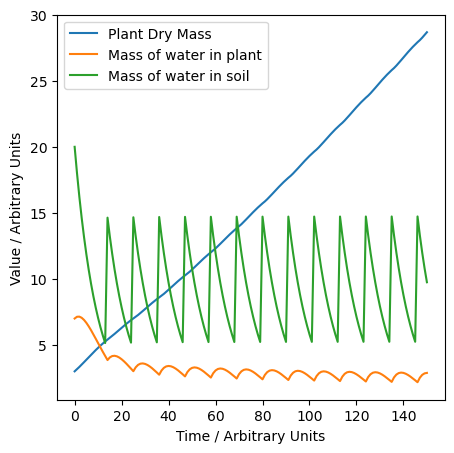

In [10]:
graph = model_plant_growth_v1(3,7,20, irrigate = True, time_ticks = 150)
draw_nice_graph(graph)

# Improvements to Model

When we try to play around with the model a little more, we start to observe that there are some peculiarities with this model, especially if we change the default parameters. Since many of these default parameters are arbitrarily manipulated to match with empirical data, and are not grounded in scientific basis, we can consider ways to improve this model for a greater range of default parameter values.

At the present moment, our model has its default parameters defined as a variable inside a function, and as such we cannot directly change these parameters without editing the function itself. We can begin by improving our model function such that it is able to take in these parameters. This will be `model_plant_growth_v2()`. For easy reference to our previous default parameter values, we can create a global variable `default_params` such that we can choose to use these values in our plotting.

In [11]:
default_params = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2)

## Increasing Model Customisability

In [12]:
def model_plant_growth_v2(x_0, w_0, v_0, parameters, time_ticks = 300, 
                          irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v2 to take in a new parameter, named: parameters. This will be
    an iterable in the sequence k_1, g, m, d, r, b, k_2, y, p. This allows for greater customisability
    in our model, making it easier to change these parameters.
    '''
    
    ### Default Variables --- Can be changed! ###
    k_1, g, m, d, r, b, k_2, y, p = parameters              
    
    ### Generating our lists to hold all relevant values ###
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###
    for timepoint in hold_timepoints[1:]:          
        update_next_timepoint_v1(parameters, hold_x, hold_w, hold_v, irrigate, irrigate_threshold, irrigate_qty)
    
    ### Creating tuples with labels for each list ###
    x_info = ("Plant Dry Mass", hold_x)
    w_info = ("Mass of water in plant", hold_w)
    v_info = ("Mass of water in soil", hold_v)
    
    return create_graph_info(hold_timepoints, x_info, w_info, v_info)

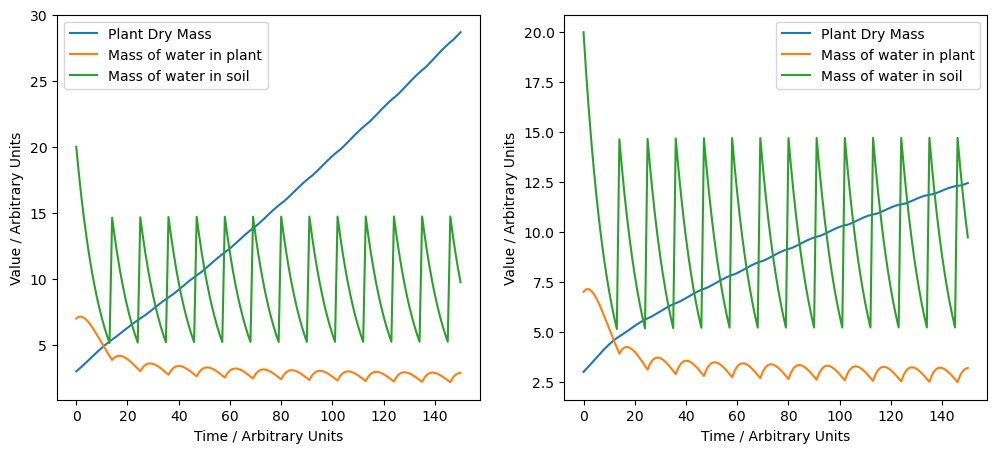

In [13]:
graph = model_plant_growth_v2(3,7,20, default_params, irrigate = True, time_ticks = 150)

my_params = (0.01, 0.1, 0.01, 1, 20, 0.1, 0.01, 0.000009, 2)       # new parameters, where m is changed from 0.00001 to 0.01
other_graph = model_plant_growth_v2(3,7,20, my_params, irrigate = True, time_ticks = 150)

draw_nice_graph(graph, other_graph)

As demonstrated by the 2 plots above, our model is able to produce the same plots as previously, as well as produce new results depending on changes to the parameters passed to the function! Hence, our new function is more customizable with modelling using different parameters now.

## Account for Negative Values

One problem with our model right now is that some parameter values can result in a graph that appears to not make sense. Consider the instance below where we use parameters identical to the default_params, but changing `r`, the limiting factor constant of $w(t)$ from 20 to 1:

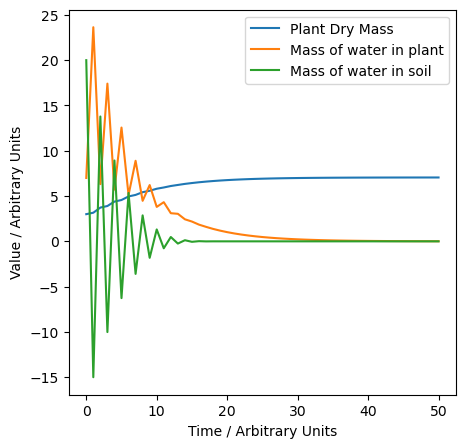

In [14]:
problem_params = (0.01, 0.1, 0.00001, 1, 1, 0.1, 0.01, 0.000009, 2)   # same as default_params, but r is changed from 20 to 1 
problem_graph = model_plant_growth_v2(3,7,20, problem_params, time_ticks = 50)
draw_nice_graph(problem_graph)

In this example, the lack of checking for negative v(t) values in the presence of a high $r$ causes w(t) to oscillate wildly between positive and negative values. To change this, we could modify our model with simple if-else conditions. We know in reality that dry mass of a plant, mass of water in a plant, and mass of water in the soil will never be negative. As such, we simply incorporate new if-else conditionals that set x(t), w(t), or v(t) to 0 when they are negative.

Below is an updated function that calculates the next timepoint but checks for negative values of $x(t)$, $w(t)$ and $v(t)$.

In [15]:
def update_next_timepoint_v2(parameter_values, hold_x, hold_w, hold_v, 
                             irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v2 to check for negative values of x, w, and v.
    If these values are negative, they will be set to 0 instead.
    '''
    k_1, g, m, d, r, b, k_2, y, p = parameter_values        # unpack the input iterables 
    
    last_x = hold_x[-1]                    # find the x, w, v at the last timepoint
    last_w = hold_w[-1]
    last_v = hold_v[-1]
    
    x_change = (k_1 * last_x * last_w/(1 + g * last_x)) - (m * last_x)         # calculate changes in x, w, and v
    w_change = (d * last_w * last_v / (1 + r * last_w)) - (b * last_w) - (k_2 * last_x * last_w / (1 + g * last_x))
    v_change = (-y * last_v) - (p * last_w * last_v / (1 + r * last_w))
    
    new_x = max(last_x + x_change, 0)         # if new_x, new_w or new_v are < 0, they are set to 0 instead
    new_w = max(last_w + w_change, 0)
    new_v = max(last_v + v_change, 0)
    
    # 2 conditions for irrigation: we are told to, and soil water level is below irrigate_threshold
    if irrigate and new_v < irrigate_threshold:              
        new_v += irrigate_qty
    
    hold_x.append(new_x)
    hold_w.append(new_w)
    hold_v.append(new_v)

In [16]:
def model_plant_growth_v3(x_0, w_0, v_0, parameters, time_ticks = 300, 
                          irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v3 to call the updated function update_next_timepoint_v2.
    '''
    
    ### Default Variables --- Can be changed! ###
    k_1, g, m, d, r, b, k_2, y, p = parameters              
    
    ### Generating our lists to hold all relevant values ###
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###
    for timepoint in hold_timepoints[1:]:          
        update_next_timepoint_v2(parameters, hold_x, hold_w, hold_v, irrigate, irrigate_threshold, irrigate_qty)
    
    ### Creating tuples with labels for each list ###
    x_info = ("Plant Dry Mass", hold_x)
    w_info = ("Mass of water in plant", hold_w)
    v_info = ("Mass of water in soil", hold_v)
    
    return create_graph_info(hold_timepoints, x_info, w_info, v_info)

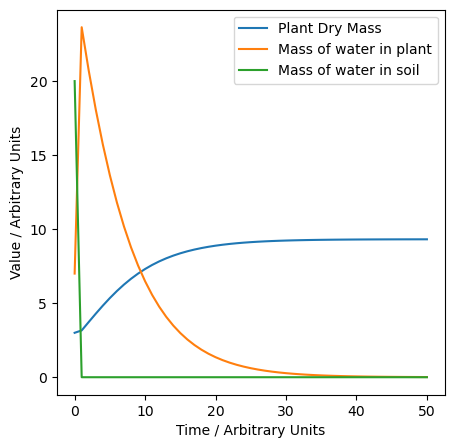

In [17]:
problem_params = (0.01, 0.1, 0.00001, 1, 1, 0.1, 0.01, 0.000009, 2)   # same as default_params, but r is changed from 20 to 1 
problem_graph = model_plant_growth_v3(3,7,20, problem_params, time_ticks = 50)

draw_nice_graph(problem_graph)

With the addition of these conditionals, we now see that our graph makes much more sense. `r` is a constant that limits the rate at which our plant can take up water, so changing the value of `r` from 20 to 1 is not impossible. This simply means a lower restriction on how fast our plant can take up water! Lowering our `r` value from 20 to 1 means a lower limit on rate of plant water uptake, and hence means much faster water uptake by our plant. As a result, we obtain the graph above: where the mass of water in plant shoots up sharply and the mass of water in soil drops very quickly, since our hypothetical plant is absorbing water at a ludicrous rate. Of course, this value of `r` and rate of water uptake by a plant is impractical, but this example simply illustrates the importance of checking for negative values to avoid such edge cases.

The previous model was unable to handle this as it did not check for negative values, but our improved `model_plant_growth_v3()` does. Now we can play around with our model with the assurance that it won't create negative numbers where it shouldn't!

## Improvement on default parameters

Recall that some of our parameters, such as `r` and `p`, were arbitrarily manipulated in our paper to fit the curves. As such, many of the default proposed values can be subject to change to better model certain aspects of plant growth. There are a few changes we propose to these parameters and their default values, as listed below:

1. `d` and `p` are two variables that are needlessly distinguished, and can be merged into the new variable `q`.
    - `d` is a constant representing the intrinsic rate of increase of water in the plant (per unit time per unit mass).
    - `p` is a constant representing the intrinsic rate of water that goes from the pond to the plant (per unit time per unit mass).
    - When we examine our equations for $w'(t)$ and $v'(t)$, we can observe that both the values of $w'(t)$ and $v'(t)$ are affected by $\frac{w (t) v (t)}{1 + r w (t)}$. $w'(t)$ is affected by positive $d \frac{w (t) v (t)}{1 + r w (t)}$, whereas $v'(t)$ is affected by negative $p\frac{w (t) v (t)}{1 + r w (t)}$. 
    - **ok so we justify that theyd o the same thing for w'(t) and v'(t) in opposite directions. since evaporation and non-plant loss of water from the soil is already accounted for, it makes sense that d == p. we can explain this somehow**
    - **all the water in a plant is used for growth, so all the water that enters the plant can be assumed to be used for growth (even if its just maintenance cos that is the same process as growth, just lower magnitude**
    - Since `d` and `p` were arbitrarily determined in the first place, we can try out an arbitrary value of the new variable `q` that is just the mean of their two default values: `q`: $\frac{2+1}{2} = 1.5$
    
    
2. `k_1` and `k_2` can be represented by the same variable `k`.
    - The paper states that they are the same whatever **because formula for photosynthesis, therefore we follow. and if this is the case they should be the same variable, no need for repeats. but i am unsure maybe the relative molecular mass will be a factor since water and carbon is nto the same mass and whatever, maybe for further diving into**
   
   
3. Default `m` value can be increased to 0.01.
    - Default `m` value in the paper is 0.00001, but this value is far too low for any serious plant degradation to be observed, even if the plant goes without water for very long timepoints. If we change the `m` value by increasing it, we start to notice non-negligible degradation of our plant dry mass.
    - Furthermore, this sets an upper limit on how high $x(t)$ can go, modelling the maximal plant growth.
    - For different plants, the value of `m` would be different (depending on their resilience to harsh conditions / lifespan), but this default value of 0.01 is more representative of most herbaceous plants (which form the bulk of agricultural crops) that  can't last too long without water, and do not live as long as woody plants.
    
    
To implement this, we will redefine our default_params to match these updated values.

In [18]:
default_params = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.000009)

In [19]:
def update_next_timepoint_v3(parameter_values, hold_x, hold_w, hold_v, 
                             irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v3 to handle new structure for parameters
    '''
    k, g, m, q, r, b, y = parameter_values        # unpack the input iterables 
    
    last_x = hold_x[-1]                    # find the x, w, v at the last timepoint
    last_w = hold_w[-1]
    last_v = hold_v[-1]
    
    x_change = (k * last_x * last_w/(1 + g * last_x)) - (m * last_x)         # calculate changes in x, w, and v
    w_change = (q * last_w * last_v / (1 + r * last_w)) - (b * last_w) - (k * last_x * last_w / (1 + g * last_x))
    v_change = (-y * last_v) - (q * last_w * last_v / (1 + r * last_w))
    
    new_x = max(last_x + x_change, 0)         # if new_x, new_w or new_v are < 0, they are set to 0 instead
    new_w = max(last_w + w_change, 0)
    new_v = max(last_v + v_change, 0)
    
    # 2 conditions for irrigation: we are told to, and soil water level is below irrigate_threshold
    if irrigate and new_v < irrigate_threshold:              
        new_v += irrigate_qty
    
    hold_x.append(new_x)
    hold_w.append(new_w)
    hold_v.append(new_v)

In [20]:
def model_plant_growth_v4(x_0, w_0, v_0, parameters, time_ticks = 300, 
                          irrigate = False, irrigate_threshold = 5, irrigate_qty = 10):
    '''
    Updated in v4 to combine variables p and d. Variables k_1 and k_2 are also combined.
    default_params is also overridden concurrently in defining this function to match these changes.
    Value of parameter m in default_params is also updated from 0.00009 to 0.01
    Also calls the new update_next_timepoint()
    '''
    
    ### Default Variables --- Can be changed! ###
    k, g, m, q, r, b, y = parameters              
    
    ### Generating our lists to hold all relevant values ###
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###
    for timepoint in hold_timepoints[1:]:          
        update_next_timepoint_v3(parameters, hold_x, hold_w, hold_v, irrigate, irrigate_threshold, irrigate_qty)
    
    ### Creating tuples with labels for each list ###
    x_info = ("Plant Dry Mass", hold_x)
    w_info = ("Mass of water in plant", hold_w)
    v_info = ("Mass of water in soil", hold_v)
    
    return create_graph_info(hold_timepoints, x_info, w_info, v_info)

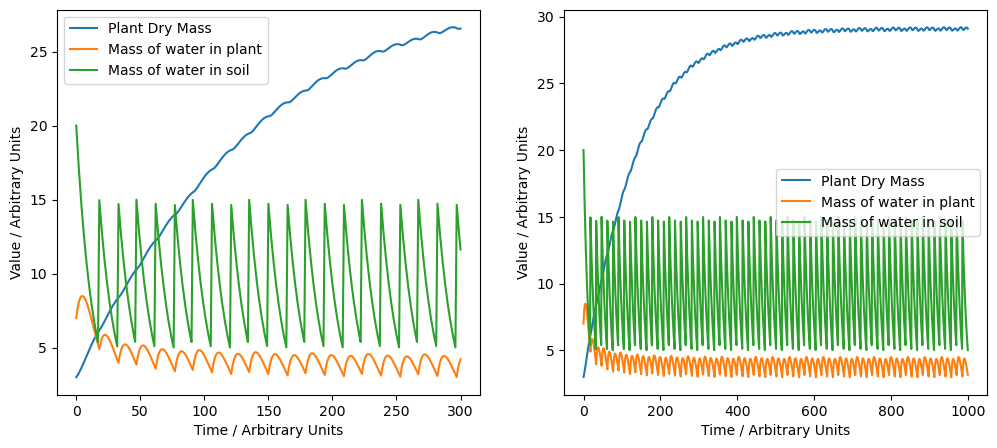

In [21]:
graph1 = model_plant_growth_v4(3,7,20, default_params, irrigate = True)
graph2 = model_plant_growth_v4(3,7,20, default_params, irrigate = True, time_ticks = 1000)

draw_nice_graph(graph1, graph2)

## Account for underwatering / overwatering

underwatering: plant growth slows, and too little, plant dies and mass goes to 0. Actually is this already modelled by a suitable value of m?

overwatering: plant suffers damage, starts to die, but can be revived back to normal state if water is normal for a good period of time

## Account for maximum plant growth

take in an input parameter that is the limit of growth for plant. constrain x(t) using this parameter

With the addition of these conditionals, we now see that our graph makes much more sense! Changing the value of $r$ from 20 to 1 is logically possible, as it simply sets a lower restriction on the rate at which $w(t)$ can change, but the previous model was unable to handle this. Now we can play around with our model with the assurance that it won't create negative numbers where it shouldn't!

# Referencing empirical data

## Overwatered Plants?

In [22]:
default_plotter(3,7,1000, irrigate = True)                 # initial massive amount of water in the soil

huge_irrigation_param = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 100, 200)        # irrigating huge amounts of water
huge_irrigation_plotter = make_plotter(huge_irrigation_param)
huge_irrigation_plotter(3,7,20, irrigate = True)

NameError: name 'default_plotter' is not defined

From what we can see here, there is another problem with our current model. When we irrigate massively or there is a lot of water present in the soil, plant dry mass, $x(t)$, increases to a substantial extent. However, this is not representative of real plants, which become oxygen-deprived with excessive watering and begin to die due to rotting of their roots. 

As such, we could take in an additional parameter for our model that corresponds to the maximum amount of water that can be in the soil ($v(t)$) before the plant begins to die. An if-else conditional could be used to check v(t) against this parameter.

Below, we have introduced the parameter to be named as plant_drown.

In [ ]:
def make_plotter(param_iter = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 5, 15, 30)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 12 items:
    (kappa, g, m, delta, r, beta, k, gamma, n, v_threshold, irrigation_qty, plant_drown)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1, 2, 15, 30)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        v_threshold = param_iter[9]
        irrigation_qty = param_iter[10]
        plant_drown = param_iter[11]
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if irrigate:                                # if the input tells us to irrigate    
                ### Irrigation Process ###
                if new_v < v_threshold:             
                    new_v += irrigation_qty
            
            if new_v > plant_drown:
                degrade_rate *= 2
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

In [ ]:
overwatered_params = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 10, 23, 30)
overwatered_plotter = make_plotter(overwatered_params)
overwatered_plotter(3,7,32, irrigate = True)

Hey check it out if u overwater for too long the plant dies sadge

# Things I don't think are needed

## Checking how n value affects x(t) [independent of w(t) and v(t)]

In [our paper of interest](https://www.mdpi.com/2227-7390/10/1/151), one of the parameters, n, which represents the extent of plant growth in response to the presence of water, is postulated to be able to take a range of values. Our paper claims that there are certain restrictions on this value of n, such that it should lie in the range (0, 1] to feasibly represent real-world situations. We can see below, in an attached figure from [the paper](https://www.mdpi.com/2227-7390/10/1/151), that n = 0.8 and n = 1 best represent how we would expect plant dry mass, x(t), to change over time.
![](https://www.mdpi.com/mathematics/mathematics-10-00151/article_deploy/html/images/mathematics-10-00151-g002.png)

In [ ]:
def check_x_n(n):
    
    omega = 0.07                       # variables used for plotting in the paper
    g = 0.1
    m = 0.01
    
    time_hold = [a for a in range(501)]      # hold all time values
    x_hold = [0.1]                           # hold all x values. Initial x value is 0.1 (arbitrarily)
    
    for timepoint in time_hold[1:]:
        last_x = x_hold[-1]
        x_change = omega * last_x / (1 + g * last_x**n) - m * last_x 
        new_x = last_x + x_change
        x_hold.append(new_x)
    return (time_hold, x_hold)

n_vals = [-1, 0, 0.8, 1, 2]            # different values of n for comparison

for n_val in n_vals:
    time, x = check_x_n(n_val)
    plt.plot(time, x, label = f'n = {n_val}')

plt.ylim(-30, 300)
plt.xlim(0, 500)
plt.ylabel("x(t)")
plt.xlabel("t")
plt.legend()
plt.show()

## Initial Model Code --- For clarity and reference

There is an example given in our paper of x(t), w(t) and v(t) values over time based on this model. We attempt to replicate it.
![](https://www.mdpi.com/mathematics/mathematics-10-00151/article_deploy/html/images/mathematics-10-00151-g005.png)

In [ ]:
### Initialising Variables ###

intrin_growth = 0.01             # kappa
limit_factor_x = 0.1             # g
degrade_rate = 0.00001           # m
intrin_water_inc = 1             # delta
limit_factor_w = 20              # r
plant_water_dec = 0.1            # beta
intrin_water_dec = 0.01          # k
pond_water_dec = 0.000009        # gamma
intrin_water_uptake = 2          # p
n = 1                            # extent of plant growth response to water
x_0 = 3                          # x(0)
w_0 = 7                          # w(0)
v_0 = 20                         # v(0)
time_endpoint = 300              # arbitrary time units
time_intervals = 1               # should always be 1
'''
Our time_intervals should always be 1, because our time_endpoint will just tell us
the number of ticks we run through. None of the time values have any reference to the
real world at the moment, so we just treat them as clock ticks
'''
hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1, time_intervals)]        # timepoints
hold_x_val = [x_0]               # all x(t) values
hold_w_val = [w_0]               # all w(t) values
hold_v_val = [v_0]               # all v(t) values


### Producing x(t), w(t), and v(t) values ###

for timepoint in hold_timepoints[1:]:          # going through every timepoint (except t = 0)
    
    last_x = hold_x_val[-1]                    # find the x, w, v at the most recent timepoint
    last_w = hold_w_val[-1]
    last_v = hold_v_val[-1]
    
    lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)                           # complicated fraction 1 (n value included)
    lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)           # complicated fraction 2
    
    # following the formulae given in the ppaer
    x_change = intrin_growth * lump_1 - degrade_rate * last_x
    w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
    v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2
    
    if timepoint < 200:                        # optional irrigation, based on given paper parameters
        if timepoint % 30 == 0:             
            v_change += 15
    
    new_x = last_x + x_change                  # new x(t), w(t), and v(t) values created
    new_w = last_w + w_change
    new_v = last_v + v_change
    
    hold_x_val.append(new_x)                   # add new values to our holding lists
    hold_w_val.append(new_w)
    hold_v_val.append(new_v)
   
### Plotting ###

plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
plt.ylabel("Value / Arbitrary Units")
plt.xlabel("Time / Arbitrary Units")
plt.xlim(0, time_endpoint)
plt.legend()
plt.show()

In [ ]:
def old_plot_plant_growth(x_0, w_0, v_0, time_ticks = 300, irrigate = False):
    '''
    A function that takes in initial values of x(0), w(0), and v(0).
    Also takes in 2 optional arguments time_ticks, an integer representing the number of ticks to run the program for.
    Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
    Default parameters for these 2 arguments are 300 and False, respectively.
    Output is a plot of x(t), w(t), and v(t) over time.
    '''
    
    # Default Variables --- Subject to change possibly #

    intrin_growth = 0.01             # kappa
    limit_factor_x = 0.1             # g
    degrade_rate = 0.00001           # m
    intrin_water_inc = 1             # delta
    limit_factor_w = 20              # r
    plant_water_dec = 0.1            # beta
    intrin_water_dec = 0.01          # k
    pond_water_dec = 0.000009        # gamma
    intrin_water_uptake = 2          # p
    
    

    # Generating our lists to hold all relevant values #
    
    hold_timepoints, hold_x, hold_w, hold_v = generate_hold_lists(time_ticks, x_0, w_0, v_0)

    ### Filling up our lists of values ###

    for timepoint in hold_timepoints[1:]:          # going through every timepoint
        
        last_x = hold_x[-1]                    # find the x, w, v at the last timepoint
        last_w = hold_w[-1]
        last_v = hold_v[-1]

        lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
        lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


        x_change = intrin_growth * lump_1 - degrade_rate * last_x
        w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
        v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2
        
        if irrigate:                                # if the input tells us to irrigate    
            
            ### Irrigation Variables ###
            start_irrigation, end_irrigation = 0, 200
            irrigation_interval = 30
            irrigation_amount = 15
            
            ### Irrigation Process ###
            if start_irrigation < timepoint < end_irrigation:
                if timepoint % irrigation_interval == 0:             
                    v_change += irrigation_amount

        new_x = last_x + x_change
        new_w = last_w + w_change
        new_v = last_v + v_change

        hold_x.append(new_x)
        hold_w.append(new_w)
        hold_v.append(new_v)

    
    plt.plot(hold_timepoints, hold_x, label = "x(t)")
    plt.plot(hold_timepoints, hold_w, label = "w(t)")
    plt.plot(hold_timepoints, hold_v, label = "v(t)")
    plt.ylabel("Value / Arbitrary Units")
    plt.xlabel("Time / Arbitrary Units")
    plt.xlim(0, time_ticks)
    plt.legend()
    plt.show()


## We allowed the function to take in different environmental parameters!

In [ ]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 10 items:
    (kappa, g, m, delta, r, beta, k, gamma, p, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 2, 1)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        intrin_water_uptake = param_iter[8]    # p
        n = param_iter[9]                      # extent of plant growth response to water
        
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_uptake * lump_2

            if irrigate:                                # if the input tells us to irrigate    

                ### Irrigation Variables ###
                start_irrigation, end_irrigation = 0, 200
                irrigation_interval = 30
                irrigation_amount = 15

                ### Irrigation Process ###
                if start_irrigation < timepoint < end_irrigation:
                    if timepoint % irrigation_interval == 0:             
                        v_change += irrigation_amount

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change

            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

In [ ]:
help(make_plotter)

In [ ]:
trial_params = [0.01, 0.1, 0.00001, 1, 3, 0.1, 0.01, 0.000009, 2, 1]
trial_plotter = make_plotter(trial_params)
trial_plotter(3,7,20, irrigate = True, time_endpoint = 300)

## Relating rho and delta to the same variable

The model of interest takes in $\rho$ (p) and $\delta$ (delta) as separate variables, where $\delta$ is the intrinsic rate of increase of water in the plant, and $\rho$ is the intrinsic rate of water that goes from the soil to the plant. This paper further states its assumption that $\delta \leq \rho$. However, it only makes sense to assume that all the water lost from the soil to the plant must necessarily contribute to water within the plant, since the only method for this water transport to occur is through root uptake by the plant.

We propose a modification to this model that removes the parameter $\rho$ entirely and simply uses the $\delta$ parameter in place of the $\rho$ parameter. For this updated default parameter $\delta$, we propose an intermediate value of 1.5. The updated function is as shown below.

In [ ]:
def make_plotter(param_iter = (0.01, 0.1, 0.00001, 1.5, 20, 0.1, 0.01, 0.000009, 1)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 9 items:
    (kappa, g, m, delta, r, beta, k, gamma, n)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            if irrigate:                                # if the input tells us to irrigate    

                ### Irrigation Variables ###
                start_irrigation, end_irrigation = 0, 200
                irrigation_interval = 30
                irrigation_amount = 15

                ### Irrigation Process ###
                if start_irrigation < timepoint < end_irrigation:
                    if timepoint % irrigation_interval == 0:             
                        v_change += irrigation_amount

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

In [ ]:
default_plotter = make_plotter()
default_plotter(3,7,20, irrigate = True)

The graph plotted by this new function still makes sense, and doesn't contradict any of our understandings regarding what plant growth should look like. It does look slightly different from the default graph of our previous model, but that's not a big problem :)

Now that we have a more robust and customizable framework behind irrigation of our crops, we notice another problem with this model. The model uses the $m$ parameter as a constant to represent multiplicative plant degradation, but either this parameter is too small or the mathematical role it plays is insufficient. Hence, we can attempt to manipulate values of m by referencing the empirical data available to us.

## Manipulating $m$

To confirm that the current value of $m$ is insufficient to represent the limit of plant growth, we can try to run a simulation with time_endpoint = 1000 to check whether $x(t)$ plateus over time or continues increasing.

In [ ]:
trial_plot_params = (0.01, 0.1, 0.00001, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
trial_plotter = make_plotter(trial_plot_params)
trial_plotter(3,7, 20, irrigate = True, time_endpoint = 1000)

As we have confirmed that this value of m is insufficient in modelling the fact that real plants gain dry mass more slowly as they age, we can try to find alternative values of m that produce a more reliable simulation.

Within the paper that we adapted this model from, another value of $m$ that was used was 0.01. In trying it out, we find that our model begins to better approximate the slowing rate of growth as plants age, such that plant dry mass does not increase linearly forever. We extend our time_endpoint to 1000 in the simulation below to check the behaviour of x(t) at large values of t.

In [ ]:
trial_plot_params = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
trial_plotter = make_plotter(trial_plot_params)
trial_plotter(3,7, 20, irrigate = True, time_endpoint = 1000)

Since we have established that m = 0.01 is more suitable than m = 0.00001, we can make this minor change to our model and edit the function such that it takes this value of m as the default.

In [ ]:
def make_plotter(param_iter = (0.01, 0.1, 0.01, 1.5, 20, 0.1, 0.01, 0.000009, 1, 2, 15)):
    '''
    A function that takes in an iterable param_iter of parameter values.
    Returns a plotter function that then takes in x(0), w(0), v(0), time_endpoint, and an irrigate boolean.
    This input iterable should consist of 11 items:
    (kappa, g, m, delta, r, beta, k, gamma, n, v_threshold, irrigation_qty)
    If you want to use default values for the parameters, call this function without an input parameter.
    The default values are:
    (0.01, 0.01, 0.00001, 1, 20, 0.1, 0.01, 0.000009, 1, 2, 15)
    '''
    def plot_plant_growth(x_0, w_0, v_0, time_endpoint = 300, irrigate = False):
        '''
        A function that takes in initial values of x(0), w(0), and v(0).
        Also takes in 2 optional arguments time_endpoint, an integer representing the number of ticks to run the program for.
        Second optional argument, irrigate, is a boolean that tells the function whether or not to irrigate the plant.
        Default parameters for these 2 arguments are 300 and False, respectively.
        Output is obvious: it just plots x(t), w(t), and v(t) over time.
        '''

        # Default Variables --- Only changeable by make_plotter() #
        
        intrin_growth = param_iter[0]          # kappa
        limit_factor_x = param_iter[1]         # g
        degrade_rate = param_iter[2]           # m
        intrin_water_inc = param_iter[3]       # delta
        limit_factor_w = param_iter[4]         # r
        plant_water_dec = param_iter[5]        # beta
        intrin_water_dec = param_iter[6]       # k
        pond_water_dec = param_iter[7]         # gamma
        n = param_iter[8]                      # extent of plant growth response to water
        v_threshold = param_iter[9]
        irrigation_qty = param_iter[10]
        
        # Generating our lists to hold all relevant values #

        hold_timepoints = [timepoint for timepoint in range(0, time_endpoint+1)]
        hold_x_val = [x_0]
        hold_w_val = [w_0]
        hold_v_val = [v_0]


        ### Filling up our lists of values ###

        for timepoint in hold_timepoints[1:]:          # going through every timepoint

            last_x = hold_x_val[-1]                    # find the x, w, v at the last timepoint
            last_w = hold_w_val[-1]
            last_v = hold_v_val[-1]

            lump_1 = last_x * last_w / (1 + limit_factor_x * last_x**n)
            lump_2 = intrin_water_inc * last_w * last_v / (1 + limit_factor_w * last_w)


            x_change = intrin_growth * lump_1 - degrade_rate * last_x
            w_change = lump_2 - plant_water_dec * last_w - intrin_water_dec * lump_1
            v_change = -pond_water_dec * last_v - intrin_water_inc * lump_2

            new_x = last_x + x_change
            new_w = last_w + w_change
            new_v = last_v + v_change
            
            if irrigate:                                # if the input tells us to irrigate    
                ### Irrigation Process ###
                if new_v < v_threshold:             
                    new_v += irrigation_qty
            
            if new_x < 0:                      # checking for negative x(t)
                new_x = 0
            if new_w < 0:                      # check negative w(t)
                new_w = 0
            if new_v < 0:                      # check negative v(t)
                new_v = 0
                
            hold_x_val.append(new_x)
            hold_w_val.append(new_w)
            hold_v_val.append(new_v)

        plt.plot(hold_timepoints, hold_x_val, label = "x(t)")
        plt.plot(hold_timepoints, hold_w_val, label = "w(t)")
        plt.plot(hold_timepoints, hold_v_val, label = "v(t)")
        plt.ylabel("Value / Arbitrary Units")
        plt.xlabel("Time / Arbitrary Units")
        plt.xlim(0, time_endpoint)
        plt.legend()
        plt.show()
    return plot_plant_growth

In [ ]:
default_plotter = make_plotter()
default_plotter(3,7,20, irrigate = True)

### Old draw_nice_graph function

In [ ]:
def draw_nice_graph(all_timepoints, *plots):
    '''
    Takes in 1 necessary argument, and a variable number of optional arguments.
    Necessary argument is all_timepoints, a list of all timepoints to serve as the x-axis.
    Optional arguments are more iterables that will be plotted on the y-axis.
    These optional arguments should consist of 2 elements, the first one a string for the plot label.
    The second element in these arguments should be the raw data itself to be plotted.
    '''
    for plot_info in plots:
        plot_name, plot_data = plot_info
        plt.plot(all_timepoints, plot_data, label = plot_name)
    
    plt.ylabel("Value / Arbitrary Units")
    plt.xlabel("Time / Arbitrary Units")
    plt.xlim(0, len(all_timepoints))
    plt.legend()
    plt.show()